In [27]:
#%%
import sqlite3
import pandas as pd
import matplotlib 

dat = sqlite3.connect('tunisair_delay.db')
query = dat.execute("SELECT * From TUNISAIR_FLIGHTS")
cols = [column[0] for column in query.description]
df= pd.DataFrame.from_records(data = query.fetchall(), columns = cols)

In [28]:
df = df.convert_dtypes()
df["DEPARTURE_DELAY"] = pd.to_numeric(df["DEPARTURE_DELAY"])
df["ARRIVAL_DELAY"] = pd.to_numeric(df["ARRIVAL_DELAY"])
print(df)

                   ID_FLIGHT FLIGHT_NUMBER FLIGHT_STATUS DEPARTURE_IATA  \
0     TU858_29_07_2022_19_30         TU858        landed            TUN   
1     BJ806_29_07_2022_20_15         BJ806        landed            TUN   
2     LN305_29_07_2022_20_15         LN305        landed            TUN   
3     AZ863_30_07_2022_09_25         AZ863     scheduled            TUN   
4    UG1758_30_07_2022_09_30        UG1758     scheduled            TUN   
..                       ...           ...           ...            ...   
144   8U490_30_07_2022_14_35         8U490     scheduled            MRA   
145  LH1744_30_07_2022_14_20        LH1744     scheduled            MUC   
146   TU903_30_07_2022_15_00         TU903     scheduled            MRS   
147   AT572_30_07_2022_13_10         AT572     scheduled            CMN   
148   BJ523_30_07_2022_15_00         BJ523     scheduled            NTE   

              DEPARTURE_AIRPORT ARRIVAL_IATA         ARRIVAL_AIRPORT  \
0                Tunis Cart

               ARRIVAL_DELAY  DEPARTURE_DELAY
FLIGHT_STATUS                                
landed                 180.0            204.0
scheduled                0.0              0.0


<AxesSubplot:title={'center':'Cumulated delays per flight status'}, xlabel='FLIGHT_STATUS'>

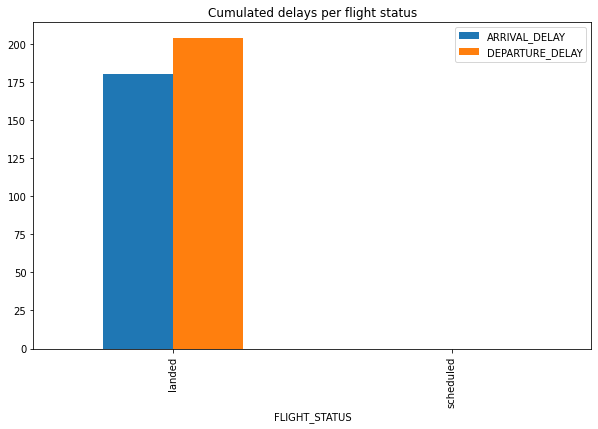

In [41]:

df_delay = df[["ARRIVAL_DELAY","DEPARTURE_DELAY", "FLIGHT_STATUS"]]
df_delay = df_delay.groupby(['FLIGHT_STATUS']).sum()

print(df_delay)
df_delay.plot(kind = 'bar',title='Cumulated delays per flight status', figsize=(10,6))

               ARRIVAL_DELAY  DEPARTURE_DELAY
FLIGHT_STATUS                                
landed                  60.0             40.8
scheduled                NaN              NaN


<AxesSubplot:title={'center':'Average delays per flight status'}, xlabel='FLIGHT_STATUS'>

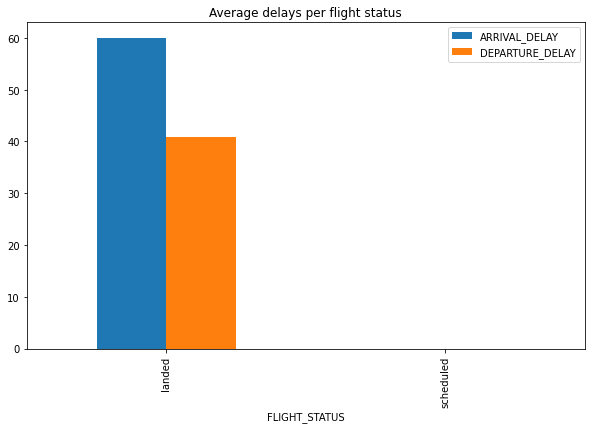

In [42]:
df_avg_delays = df[["ARRIVAL_DELAY","DEPARTURE_DELAY", "FLIGHT_STATUS"]]
df_avg_delays = df_avg_delays.groupby(['FLIGHT_STATUS']).mean()

print(df_avg_delays)
df_avg_delays.plot(kind = 'bar',title='Average delays per flight status', figsize=(10,6))